<a href="https://colab.research.google.com/github/avc9/NLPlay-with-Transformers--SoC-2021/blob/main/Week2_Tf_Idf_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the essential libraries**


In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import sklearn
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import random

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
data=pd.read_csv("/content/drive/MyDrive/SOC-2021 data/IMDB Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
stop_words=set(stopwords.words('english'))

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

data['review']=data['review'].apply(denoise_text)
print(data.head(5))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
def stem_tokenizer(text):
  tokenizer=nltk.RegexpTokenizer(r"\w+")
  stemmer=PorterStemmer()
  return [(stemmer.stem(word)).lower() for word in tokenizer.tokenize(text) if word.lower() not in stop_words]

data['review']=data['review'].apply(stem_tokenizer)
print(data.head(5))
print(data['review'][0])

                                              review sentiment
0  [one, review, mention, watch, 1, oz, episod, h...  positive
1  [wonder, littl, product, film, techniqu, unass...  positive
2  [thought, wonder, way, spend, time, hot, summe...  positive
3  [basic, famili, littl, boy, jake, think, zombi...  negative
4  [petter, mattei, love, time, money, visual, st...  positive
['one', 'review', 'mention', 'watch', '1', 'oz', 'episod', 'hook', 'right', 'exactli', 'happen', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'hardcor', 'classic', 'use', 'word', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', 'aryan', 'mus

In [6]:
def detokenizer_func(text):
  detokenizer=TreebankWordDetokenizer()
  text=detokenizer.detokenize(text)
  return text

data['review']=data['review'].apply(detokenizer_func)
print(data.head(5))
print(data['review'][0])

                                              review sentiment
0  one review mention watch 1 oz episod hook righ...  positive
1  wonder littl product film techniqu unassum old...  positive
2  thought wonder way spend time hot summer weeke...  positive
3  basic famili littl boy jake think zombi closet...  negative
4  petter mattei love time money visual stun film...  positive
one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget

<h1><b>Limiting max features based on Zipf's law</b></h1>

In [43]:
tidif=TfidfVectorizer(max_features=10000)
tidif_data=tidif.fit_transform(data['review'])

In [44]:
row=tidif_data[0,:]
print(row.shape)

(1, 10000)


In [9]:
def class_pre(val):
  if val=='positive':
    return 1
  else:
    return 0
data['sentiment']=data['sentiment'].apply(class_pre)
print(data.sentiment.value_counts())

1    25000
0    25000
Name: sentiment, dtype: int64


In [45]:
X_train,X_test,y_train,y_test=train_test_split(tidif_data,data['sentiment'],train_size=0.7,shuffle=True,random_state=15)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(y_train.values.reshape(35000,1))

(35000, 10000)
(35000,)
(15000, 10000)
(15000,)


<h1><b>Testing with Logistic Regression</b></h1>

In [47]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
"""#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)"""
#Fitting the model for tfidf features
lr_tfidf=lr.fit(X_train,y_train)
#print(lr_tfidf)

"""lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)"""
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(X_test)
print(lr_tfidf_predict.shape)

#Accuracy score for bag of words
"""lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)"""
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

(15000,)
lr_tfidf_score : 0.8866


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [48]:
class net(nn.Module):
  def __init__(self,input_dim):
    super(net,self).__init__()
    #self.bn1=nn.BatchNorm1d(input_dim)
    self.fc1=nn.Linear(input_dim,500)
    self.g1=nn.ReLU()
    #self.bn2=nn.BatchNorm1d(128)
    #self.d1=nn.Dropout(p=0.4)
    self.fc2=nn.Linear(500,500)
    self.g2=nn.ReLU()
    #self.bn3=nn.BatchNorm1d(256)
    self.fc3=nn.Linear(500,1)
    self.g3=nn.Sigmoid()
    
  def forward(self, x):
    #out=self.bn1(x)
    out=x
    out=self.fc1(out)
    out=self.g1(out)
    #out=F.dropout(out,p=0.2)
    #out=self.bn2(out)
    #out=self.d1(out)
    out=self.fc2(out)
    out=self.g2(out)
    #out=F.dropout(out,p=0.2)
    #out=self.bn3(out)
    out=self.fc3(out)
    out=self.g3(out)
    return out

print(net(X_train.shape[1]))

net(
  (bn1): BatchNorm1d(10000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=10000, out_features=500, bias=True)
  (g1): ReLU()
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (g2): ReLU()
  (fc3): Linear(in_features=500, out_features=1, bias=True)
  (g3): Sigmoid()
)


In [49]:
net1=net(X_train.shape[1])
params = list(net1.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([10000])


In [53]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(net1.parameters(), lr=0.01, weight_decay=0.01)

epoch 1.    train_loss=0.020567      test_loss=0.000000
epoch 2.    train_loss=0.020020      test_loss=0.000000
epoch 3.    train_loss=0.019362      test_loss=0.000000
epoch 4.    train_loss=0.018583      test_loss=0.000000
epoch 5.    train_loss=0.017687      test_loss=0.000000
epoch 6.    train_loss=0.016695      test_loss=0.000000
epoch 7.    train_loss=0.015642      test_loss=0.000000
epoch 8.    train_loss=0.014574      test_loss=0.000000
epoch 9.    train_loss=0.013537      test_loss=0.000000
epoch 10.    train_loss=0.012563      test_loss=0.000000
epoch 11.    train_loss=0.011672      test_loss=0.000000
epoch 12.    train_loss=0.010870      test_loss=0.000000
epoch 13.    train_loss=0.010153      test_loss=0.000000
epoch 14.    train_loss=0.009514      test_loss=0.000000
epoch 15.    train_loss=0.008942      test_loss=0.000000
epoch 16.    train_loss=0.008429      test_loss=0.000000
epoch 17.    train_loss=0.007967      test_loss=0.000000
epoch 18.    train_loss=0.007548      te

No handles with labels found to put in legend.


epoch 25.    train_loss=0.005414      test_loss=0.000000


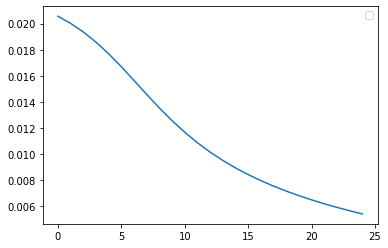

In [75]:
iters=25
train_loss=[]
test_loss=[]
train_loss_buff=0
test_loss_buff=0
batch=1024
offset=0
for j in range(iters):
  while (offset+batch<35000):
    #number=random.randint(0,X_test.shape[0]-batch)

    inputs=X_train.copy()[offset:offset+batch,:]
    labels=torch.tensor(y_train.copy().values,dtype=torch.float32)
    labels=labels[offset:offset+batch]
    offset=offset+batch

    """inputs=X_train.copy()
    labels=torch.tensor(y_train.copy().values,dtype=torch.float32)"""

    """inputs_test=X_test.copy()[number:number+batch,:]
    labels_test=torch.tensor(y_test.copy().values,dtype=torch.float32)
    labels_test=labels_test[number:number+batch]
    offset=offset+batch"""

    #Converting Sparse matrix to Pytorch Tensor Begins

    Acoo = inputs.tocoo()
    #print('Acoo',Acoo)

    values = Acoo.data
    indices = np.vstack((Acoo.row, Acoo.col))

    i = torch.LongTensor(indices)
    v = torch.FloatTensor(values)
    shape = Acoo.shape

    inputs=torch.sparse.FloatTensor(i, v, torch.Size(shape)).to_dense()
    

    ###Conversion Process Ends

    """Acoo = inputs_test.tocoo()
    #print('Acoo',Acoo)

    values = Acoo.data
    indices = np.vstack((Acoo.row, Acoo.col))

    i = torch.LongTensor(indices)
    v = torch.FloatTensor(values)
    shape = Acoo.shape

    inputs_test=torch.sparse.FloatTensor(i, v, torch.Size(shape)).to_dense()"""


    optimizer.zero_grad()

    outputs = net1(inputs)
    #outputs_test=net1(inputs_test)

    outputs=outputs.flatten()
    #outputs_test=outputs_test.flatten()

    loss = criterion(outputs, labels)
    #loss_test=criterion(outputs_test, labels_test)
    loss.backward()
    optimizer.step()

    
    train_loss_buff+=loss.item()
    #test_loss_buff+=loss_test.item()
    


    #print('iter %d loss: %.3f' %(i + 1,loss.item()))
    #plt.plot(loss.item())
    #train_loss.append(loss.item())
    #test_loss.append(loss_test.item())
    #cur_train=(loss.item()).numpy()
    #cur_test=loss_test.item()
    #print(outputs.dtype)
    #print(labels.dtype)
  train_loss.append(train_loss_buff/batch)
  test_loss.append(test_loss_buff/batch)  
  print("epoch %d.    train_loss=%f      test_loss=%f" % (j+1,train_loss_buff/batch,test_loss_buff/batch))
  offset=0
  train_loss_buff=0
  train_loss_buff=0

plt.plot(train_loss)
#plt.plot(test_loss)
plt.legend()
plt.show()

In [76]:
#Converting Sparse test matrix to Pytorch Tensor

inputs_test=X_test.copy()
Acoo = inputs_test.tocoo()
#print('Acoo',Acoo)

values = Acoo.data
indices = np.vstack((Acoo.row, Acoo.col))

i = torch.LongTensor(indices)
v = torch.FloatTensor(values)
shape = Acoo.shape

inputs_test=torch.sparse.FloatTensor(i, v, torch.Size(shape)).to_dense()

prediction=net1(inputs_test)
print(prediction.dtype)

torch.float32


In [78]:
prediction=prediction.flatten()
print(prediction.shape)
preds=prediction.detach().numpy()
print(preds.shape)
#y_test=y_test.to_numpy()
print(y_test.shape)
print(preds)
final_preds=np.array([])
for iterator in preds.copy():
  if (iterator>0.5):
    final_preds=np.append(final_preds,1)
  else :
    final_preds=np.append(final_preds,0)
print(final_preds)
print(final_preds.shape)
from sklearn.metrics import classification_report


torch.Size([15000])
(15000,)
(15000,)
[0.07544795 0.14692518 0.9984486  ... 0.08188771 0.03738041 0.9366346 ]
[0. 0. 1. ... 0. 0. 1.]
(15000,)


In [79]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7488
           1       0.88      0.89      0.89      7512

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000

